In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon
import json
import folium
from geopandas import GeoDataFrame
from sklearn import preprocessing 
import seaborn as sns

In [2]:
os.chdir(r"Downloads")
lists =pd.read_csv('listings.csv') 

In [3]:
lists

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2265,Zen-East in the Heart of Austin (monthly rental),2466,Paddy,NaN,78702,30.27750,-97.71398,Entire home/apt,200,7,24,2019-03-16,0.17,3,131
1,5245,"Eco friendly, Colorful, Clean, Cozy monthly share",2466,Paddy,NaN,78702,30.27577,-97.71379,Private room,114,30,9,2018-03-14,0.06,3,0
2,5456,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,NaN,78702,30.26112,-97.73448,Entire home/apt,104,2,543,2021-02-01,3.74,1,354
3,5636,"Soco, Barton Springs Private Guest Cottage",7148,Peggy,NaN,78704,30.24630,-97.76361,Entire home/apt,46,30,21,2020-11-06,0.15,2,67
4,5769,NW Austin Room,8186,Elizabeth,NaN,78729,30.45697,-97.78422,Private room,39,1,259,2021-02-10,1.96,1,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10267,48107269,Residences at the Domain,368944610,Kia,NaN,78758,30.40051,-97.72527,Entire home/apt,185,31,0,NaN,NaN,40,304
10268,48107277,Residences at the Domain,368944610,Kia,NaN,78758,30.40051,-97.72527,Entire home/apt,153,31,0,NaN,NaN,40,331
10269,48109299,Relax in comfort | 1BR in Austin,359036978,Kia,NaN,78729,30.45118,-97.77480,Entire home/apt,82,30,0,NaN,NaN,358,360
10270,48109324,A place of your own | 1BR in Austin,359036978,Kia,NaN,78701,30.26519,-97.74229,Entire home/apt,153,30,0,NaN,NaN,358,324


In [4]:
ngj =gpd.read_file('neighbourhoods.geojson')
ngj

,neighbourhood,neighbourhood_group,geometry
0,78739,None,"MULTIPOLYGON (((-97.89002 30.20941, -97.88929 ..."
1,78754,None,"MULTIPOLYGON (((-97.63658 30.40266, -97.63754 ..."
2,78732,None,"MULTIPOLYGON (((-97.87303 30.43806, -97.87335 ..."
3,78737,None,"MULTIPOLYGON (((-98.01876 30.24167, -98.01617 ..."
4,78756,None,"MULTIPOLYGON (((-97.72792 30.32906, -97.72760 ..."
5,78747,None,"MULTIPOLYGON (((-97.73617 30.15986, -97.73591 ..."
6,78751,None,"MULTIPOLYGON (((-97.70677 30.32211, -97.70693 ..."
7,78712,None,"MULTIPOLYGON (((-97.73366 30.28536, -97.73295 ..."
8,78738,None,"MULTIPOLYGON (((-98.00622 30.36079, -98.00424 ..."
9,78725,None,"MULTIPOLYGON (((-97.62338 30.26459, -97.62126 ..."


In [5]:
lists['neighbourhood'] = lists['neighbourhood'].astype(int)
ngj['neighbourhood'] = ngj['neighbourhood'].astype(int)
ngj.drop('neighbourhood_group',inplace=True, axis=1)

In [16]:
merged = pd.merge(ngj, lists, on="neighbourhood")
merged

,neighbourhood,geometry,id,name,host_id,host_name,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,78739,"MULTIPOLYGON (((-97.89002 30.20941, -97.88929 ...",385602,SXSW!! - Accommodations,1929911,Ernest,NaN,30.16976,-97.86306,Entire home/apt,1200,3,0,NaN,NaN,1,0
1,78739,"MULTIPOLYGON (((-97.89002 30.20941, -97.88929 ...",2989616,!South Austin Private room2,7567467,Chalu,NaN,30.18864,-97.88932,Private room,35,30,34,2020-08-19,0.51,4,233
2,78739,"MULTIPOLYGON (((-97.89002 30.20941, -97.88929 ...",4289075,2 Cozy Bedrooms- 25 min. from Race.,22268233,Brandon,NaN,30.14190,-97.85239,Entire home/apt,400,1,0,NaN,NaN,1,0
3,78739,"MULTIPOLYGON (((-97.89002 30.20941, -97.88929 ...",5417341,AUSTIN OASIS w/Pool & Hot tub,28082332,Karen,NaN,30.18823,-97.86984,Entire home/apt,253,3,88,2020-12-30,1.41,1,164
4,78739,"MULTIPOLYGON (((-97.89002 30.20941, -97.88929 ...",5524631,Single Family Home with Pool,28649640,Natalie,NaN,30.18654,-97.89452,Entire home/apt,1099,1,0,NaN,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10267,78701,"MULTIPOLYGON (((-97.73599 30.25101, -97.73589 ...",48025543,Chic 2 BR Accommodations in The Heart of Austin,79259184,Rick,NaN,30.27164,-97.74757,Entire home/apt,144,2,0,NaN,NaN,2,33
10268,78701,"MULTIPOLYGON (((-97.73599 30.25101, -97.73589 ...",48028719,2BR Presidential Suite In Gorgeous Austin TX,371942068,Joy,NaN,30.27261,-97.74859,Entire home/apt,349,2,0,NaN,NaN,4,364
10269,78701,"MULTIPOLYGON (((-97.73599 30.25101, -97.73589 ...",48057584,A place of your own | 1BR in Austin,359036978,Kia,NaN,30.26519,-97.74229,Entire home/apt,133,30,0,NaN,NaN,358,299
10270,78701,"MULTIPOLYGON (((-97.73599 30.25101, -97.73589 ...",48058992,Enjoy like a local in the heart of Rainey st,387405041,Alex,NaN,30.26048,-97.73664,Entire home/apt,95,1,0,NaN,NaN,2,33


In [7]:
 merged['calculated_host_listings_count'].isnull().sum()

0

# Top 10 areas based on total number of listings

In [8]:
df = merged.groupby('neighbourhood')['calculated_host_listings_count'].count()
df = df.nlargest(10,keep = 'all')
df = pd.merge(df, ngj, on="neighbourhood")
df = GeoDataFrame(df)
l =  GeoDataFrame(pd.DataFrame(np.vstack([df.neighbourhood, df.centroid.y, df.centroid.x]).T, columns=['neighbourhood', 'latitude', 'longitude']))
df = pd.merge(df, l, on="neighbourhood")
df = df.drop_duplicates(subset = ["neighbourhood"])
df

<ipython-input-8-35cb9673ed25>:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  l =  GeoDataFrame(pd.DataFrame(np.vstack([df.neighbourhood, df.centroid.y, df.centroid.x]).T, columns=['neighbourhood', 'latitude', 'longitude']))


,neighbourhood,calculated_host_listings_count,geometry,latitude,longitude
0,78704,1822,"MULTIPOLYGON (((-97.75447 30.26507, -97.75410 ...",30.243726,-97.765474
1,78702,1263,"MULTIPOLYGON (((-97.69186 30.24848, -97.69172 ...",30.263176,-97.714539
2,78701,713,"MULTIPOLYGON (((-97.73599 30.25101, -97.73589 ...",30.270477,-97.742088
3,78741,622,"MULTIPOLYGON (((-97.70652 30.25024, -97.70628 ...",30.230396,-97.714884
4,78703,530,"MULTIPOLYGON (((-97.76606 30.31295, -97.76482 ...",30.291098,-97.766181
5,78745,513,"MULTIPOLYGON (((-97.79207 30.23183, -97.78922 ...",30.207018,-97.796756
6,78705,505,"MULTIPOLYGON (((-97.72978 30.29871, -97.72893 ...",30.292545,-97.738728
7,78751,478,"MULTIPOLYGON (((-97.70677 30.32211, -97.70693 ...",30.310146,-97.723876
8,78723,313,"MULTIPOLYGON (((-97.66540 30.28564, -97.66595 ...",30.303803,-97.685944
9,78758,298,"MULTIPOLYGON (((-97.71223 30.34801, -97.71246 ...",30.387775,-97.706897


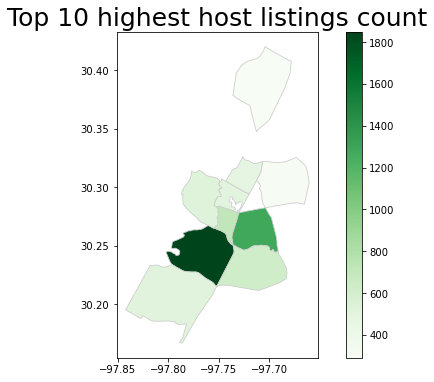

In [9]:
variable = 'calculated_host_listings_count'
vmin, vmax = 290, 1850
fig, ax = plt.subplots(1, figsize=(10, 6))
df.plot(column=variable, cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.set_title('Top 10 highest host listings count', fontdict={'fontsize': '25', 'fontweight' : '3'})
sm = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
fig.savefig('map_export.png', dpi=300)

In [10]:
m = folium.Map(location=[np.median(df['latitude'].tolist()), np.median(df['longitude'].tolist())], tiles='OpenStreetMap', zoom_start=10)

m.choropleth(
    geo_data=ngj,
    name='Listings',
    data=df,
    columns=['neighbourhood', 'calculated_host_listings_count'],
    legend_name='Calculated_host_listings_count'
)  

fg = folium.FeatureGroup(name='Listing count')
for lat, lon,  val, name in zip(df['latitude'].tolist(), df['longitude'].tolist(), df['calculated_host_listings_count'].tolist(),df['neighbourhood'].tolist()):
    html = f"""
    <h2>{name}<\h2><br>
    <h4>Listing: {int(round(val,0))} <\h4>
    """
    fg.add_child(folium.Marker(location=[lat,lon], popup=html))

m.add_child(fg)

folium.LayerControl().add_to(m)

m.save('highest no. of listings.html')

C:\Users\vashundhra\anaconda3\envs\geo\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [11]:
merged['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

# Thematic map displaying the number of Single room ( Private room, Shared room or Hotel room) in any neighbourhood

In [12]:
room = merged
room['room_type'] = room['room_type'].replace(['Entire home/apt'],0)
room['room_type'] = room['room_type'].replace(['Private room', 'Shared room', 'Hotel room'],1)
room = room.groupby('neighbourhood')['room_type'].sum()
room = pd.merge(ngj, room, on="neighbourhood")
room

,neighbourhood,geometry,room_type
0,78739,"MULTIPOLYGON (((-97.89002 30.20941, -97.88929 ...",6
1,78754,"MULTIPOLYGON (((-97.63658 30.40266, -97.63754 ...",57
2,78732,"MULTIPOLYGON (((-97.87303 30.43806, -97.87335 ...",6
3,78737,"MULTIPOLYGON (((-98.01876 30.24167, -98.01617 ...",8
4,78756,"MULTIPOLYGON (((-97.72792 30.32906, -97.72760 ...",31
5,78747,"MULTIPOLYGON (((-97.73617 30.15986, -97.73591 ...",23
6,78751,"MULTIPOLYGON (((-97.70677 30.32211, -97.70693 ...",143
7,78712,"MULTIPOLYGON (((-97.73366 30.28536, -97.73295 ...",1
8,78738,"MULTIPOLYGON (((-98.00622 30.36079, -98.00424 ...",7
9,78725,"MULTIPOLYGON (((-97.62338 30.26459, -97.62126 ...",26


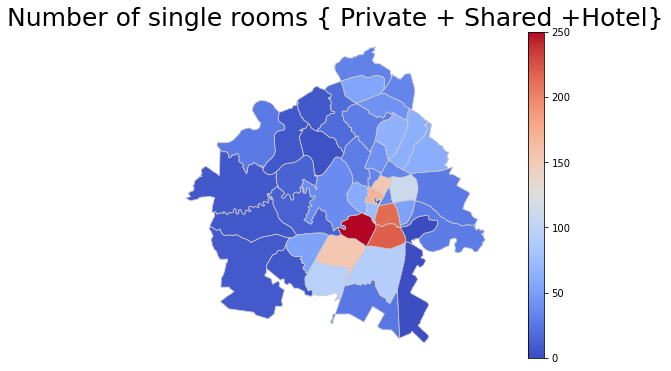

In [13]:
variable = 'room_type'
vmin, vmax = 0, 250
fig, ax = plt.subplots(1, figsize=(10, 6))
room.plot(column=variable, cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')
ax.set_title('Number of single rooms { Private + Shared +Hotel}', fontdict={'fontsize': '25', 'fontweight' : '3'})
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
fig.savefig('map_export.png', dpi=300)

# Thematic map displaying the number of entire home / apartments in any neighbourhood

In [17]:
home = merged
home['room_type'] = home['room_type'].replace(['Entire home/apt'],1)
home['room_type'] = home['room_type'].replace(['Private room', 'Shared room', 'Hotel room'],0)
home = home.groupby('neighbourhood')['room_type'].sum()
home = pd.merge(ngj, home, on="neighbourhood")
variable = 'room_type'
home

,neighbourhood,geometry,room_type
0,78739,"MULTIPOLYGON (((-97.89002 30.20941, -97.88929 ...",19
1,78754,"MULTIPOLYGON (((-97.63658 30.40266, -97.63754 ...",49
2,78732,"MULTIPOLYGON (((-97.87303 30.43806, -97.87335 ...",41
3,78737,"MULTIPOLYGON (((-98.01876 30.24167, -98.01617 ...",89
4,78756,"MULTIPOLYGON (((-97.72792 30.32906, -97.72760 ...",98
5,78747,"MULTIPOLYGON (((-97.73617 30.15986, -97.73591 ...",17
6,78751,"MULTIPOLYGON (((-97.70677 30.32211, -97.70693 ...",335
7,78712,"MULTIPOLYGON (((-97.73366 30.28536, -97.73295 ...",1
8,78738,"MULTIPOLYGON (((-98.00622 30.36079, -98.00424 ...",37
9,78725,"MULTIPOLYGON (((-97.62338 30.26459, -97.62126 ...",16


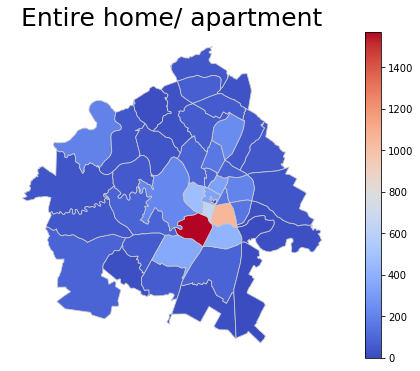

In [18]:
variable = 'room_type'
vmin, vmax = 0, 1570
fig, ax = plt.subplots(1, figsize=(10, 6))
home.plot(column=variable, cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')
ax.set_title('Entire home/ apartment', fontdict={'fontsize': '25', 'fontweight' : '3'})
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
fig.savefig('map_export.png', dpi=300)

# Who are the top 10 hosts based on their total number of listings

In [19]:
#ignoring the anonymous hosts
df1 = merged.groupby('host_name')['calculated_host_listings_count'].count()
df1.nlargest(10,keep = 'all')

host_name
Kia                         398
WanderJaunt                 131
TurnKey Vacation Rentals    124
Martin                      101
Michael                      98
David                        76
Sarah                        74
Ryan                         67
James                        62
Renters Club                 56
Name: calculated_host_listings_count, dtype: int64

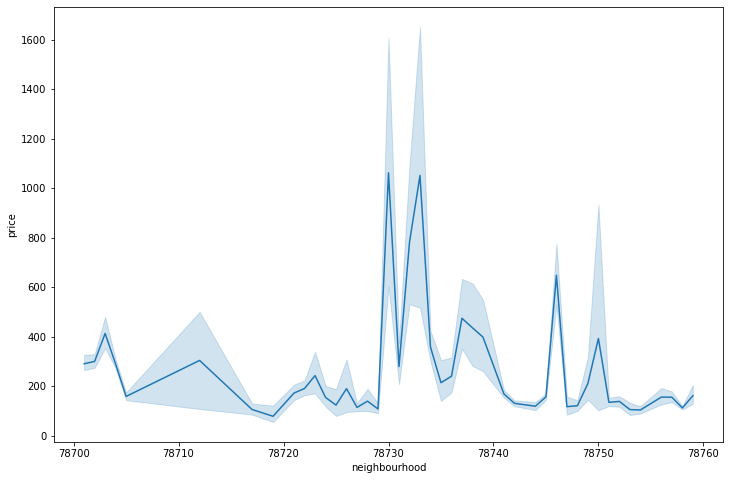

In [31]:
plt.figure(figsize=(12, 8))
X =merged['neighbourhood']
Y =merged['price']
sns.lineplot(x =X, y = Y)
plt.show()

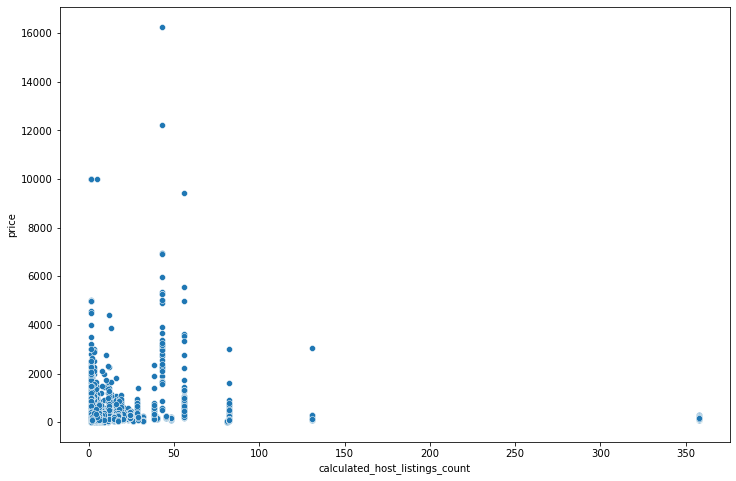

In [33]:
plt.figure(figsize=(12, 8))
X =merged['calculated_host_listings_count']
Y =merged['price']
sns.scatterplot(x =X, y = Y)
plt.show()

<AxesSubplot:>

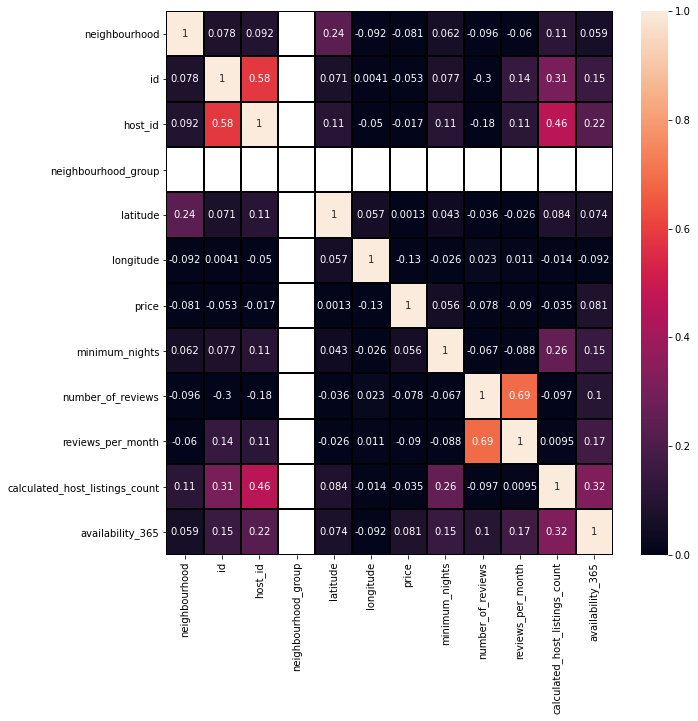

In [7]:
plt.figure(figsize=(10, 10))
#calculating correlation matrix and plotting hatmap through seaborn
corr = merged.corr()
sns.heatmap(corr,  vmin=0, vmax=1, annot=True, linewidth=0.02, linecolor='black')